# Method of images

get flow around a straight wall

The method of images is simply this: put a singularity near a "wall" by adding an "image" singularity on the other side of the wall. Sometimes, this is also referrered to as aerodynamic interferences.

In addition to that, this notebook also gives us the opportunity to introduce the notion of classes in Python. This is a very useful way to organize your code, that becomes crucial as programs get more complex.

# Source near the wall

In [49]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [50]:
N = 50
x_start, x_end = -2.0, 2.0
y_start, y_end = -1.0, 1.0
x = numpy.linspace(x_start, x_end, N)
y = numpy.linspace(y_start, y_end, N)
X, Y = numpy.meshgrid(x, y)

In [51]:
class Source:
    def __init__(self, strength, x, y):
        self.strength = strength
        self.x, self.y = x, y
    
    def velocity(self, X, Y):
        self.u = self.strength/(2*math.pi)*(X-self.x)/((X-self.x)**2+(Y-self.y)**2)
        self.v = self.strength/(2*math.pi)*(Y-self.y)/((X-self.x)**2+(Y-self.y)**2)
    
    def stream_function(self, X, Y):
        self.psi = self.strength/(2*math.pi)*numpy.arctan2((Y-self.y), (X-self.x))

In [52]:
strength_source = 1.0                          
x_source, y_source = 0.0, 0.5          
#get the velocity and streamfunction of the source 
source = Source(strength_source, x_source, y_source)
source.velocity(X, Y)
source.stream_function(X, Y)

In [53]:
#get the velocity and streamfunction of the image source 
source_image = Source(strength_source, x_source, -y_source)
source_image.velocity(X, Y)
source_image.stream_function(X, Y)

In [54]:
# superposition of the source and its image

u = source.u + source_image.u
v = source.v + source_image.v
psi = source.psi + source_image.psi

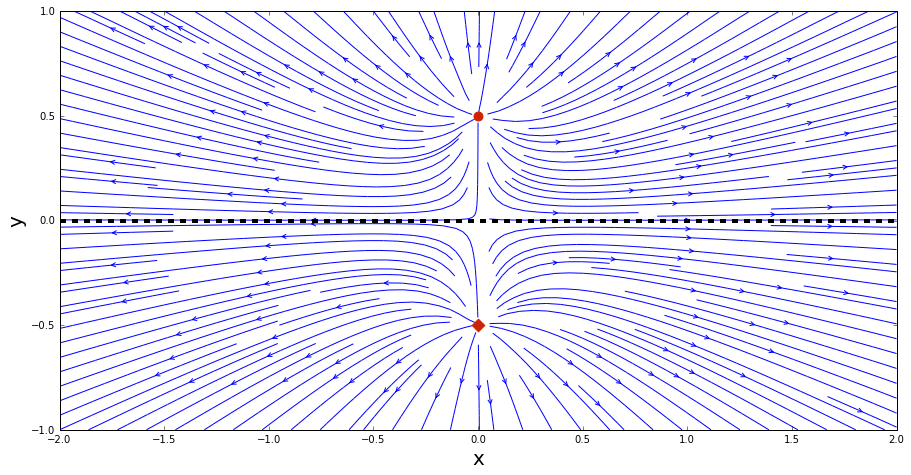

In [55]:
#plot the streamlines

size = 15
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=20)
pyplot.ylabel('y', fontsize=20)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(source.x, source.y, color='#CD2305', s=80, marker='o')
pyplot.scatter(source_image.x, source_image.y, color='#CD2305', s=80, marker='D')
pyplot.axhline(0., color='k', linestyle='--', linewidth=4);

# Vortex near the wall

In [56]:
class Vortex:
    def __init__(self, strength, x, y):
        self.strength = strength
        self.x, self.y = x, y
    def velocity(self, X, Y):
        self.u = +self.strength/(2*math.pi)*(Y-self.y)/((X-self.x)**2+(Y-self.y)**2)
        self.v = -self.strength/(2*math.pi)*(X-self.x)/((X-self.x)**2+(Y-self.y)**2)
    def stream_function(self, X, Y):
        self.psi = -self.strength/(4*math.pi)*numpy.log((X-self.x)**2+(Y-self.y)**2)

In [57]:
strength_vortex = 1.0
x_vortex, y_vortex = 0.0, 0.5

vortex = Vortex(strength_vortex, x_vortex, y_vortex)
vortex.velocity(X, Y)
vortex.stream_function(X, Y)

vortex_image = Vortex(-strength_vortex, x_vortex, -y_vortex)
vortex_image.velocity(X, Y)
vortex_image.stream_function(X, Y)

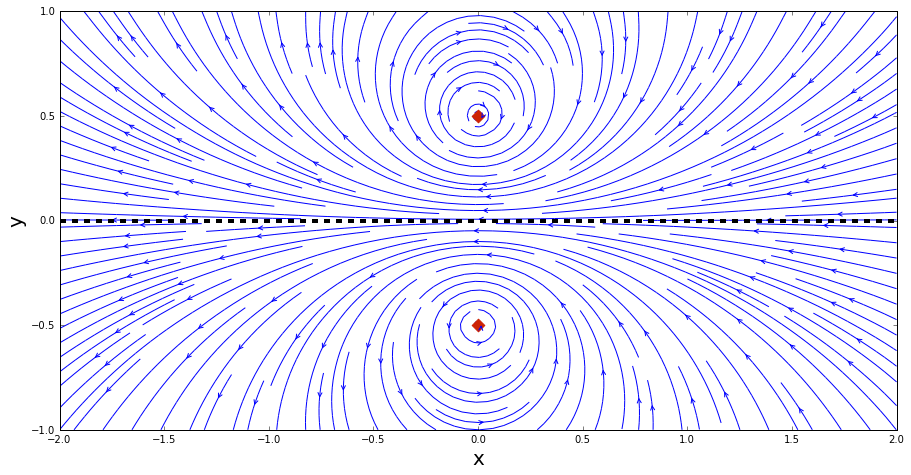

In [58]:
u = vortex.u + vortex_image.u
v = vortex.v + vortex_image.v
psi = vortex.psi + vortex_image.psi

size = 15
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=20)
pyplot.ylabel('y', fontsize=20)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='D')
pyplot.scatter(x_vortex, -y_vortex, color='#CD2305', s=80, marker='D')
pyplot.axhline(0., color='k', linestyle='--', linewidth=4)

# Motion of a vortex pair near the ground

In [68]:
strength_vortex = 1.0
x_vortex1, y_vortex1 = -0.1, 0.5
x_vortex2, y_vortex2 = +0.1, 0.5
#vortex 1 and 2
vortex1 = Vortex(+strength_vortex, x_vortex1, y_vortex1)
vortex1.velocity(X, Y)
vortex1.stream_function(X, Y)

vortex2 = Vortex(-strength_vortex, x_vortex2, y_vortex2)
vortex2.velocity(X, Y)
vortex2.stream_function(X, Y)
#vortex_image 1 and 2
vortex1_image = Vortex(-strength_vortex, x_vortex1, -y_vortex1)
vortex2_image = Vortex(+strength_vortex, x_vortex2, -y_vortex2)

vortex1_image.velocity(X, Y)
vortex1_image.stream_function(X, Y)
vortex2_image.velocity(X, Y)
vortex2_image.stream_function(X, Y)

In [69]:
#superposition
u = vortex1.u + vortex2.u + vortex1_image.u + vortex2_image.u
v = vortex1.v + vortex2.v + vortex1_image.v + vortex2_image.v
psi = vortex1.psi + vortex2.psi + vortex1_image.psi + vortex2_image.psi

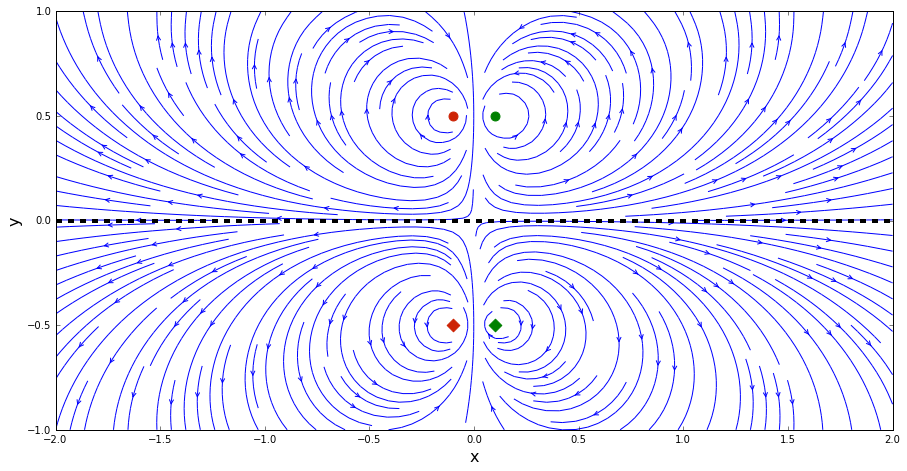

In [70]:
#plot
size = 15
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(vortex1.x, vortex1.y, color='#CD2305', s=80, marker='o')
pyplot.scatter(vortex2.x, vortex2.y, color='g', s=80, marker='o')
pyplot.scatter(vortex1_image.x, vortex1_image.y, color='#CD2305', s=80, marker='D')
pyplot.scatter(vortex2_image.x, vortex2_image.y, color='g', s=80, marker='D')
pyplot.axhline(0., color='k', linestyle='--', linewidth=4);

# Doublet near a plane wall parallel to a uniform flow

In [72]:
u_inf = 1.0
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)
psi_freestream = u_inf * Y


In [73]:
class Doublet:
    def __init__(self, strength, x, y):
        self.strength = strength
        self.x, self.y = x, y
    def velocity(self, X, Y):
        self.u = -self.strength/(2*math.pi)*\
                ((X-self.x)**2-(Y-self.y)**2)/((X-self.x)**2+(Y-self.y)**2)**2
        self.v = -self.strength/(2*math.pi)*\
                2*(X-self.x)*(Y-self.y)/((X-self.x)**2+(Y-self.y)**2)**2
    def stream_function(self, X, Y):
        self.psi = -self.strength/(2*math.pi)*(Y-self.y)/((X-self.x)**2+(Y-self.y)**2)

In [74]:
strength_doublet = 1.0
x_doublet, y_doublet = 0.0, 0.3
doublet = Doublet(strength_doublet, x_doublet, y_doublet)
doublet.velocity(X, Y)
doublet.stream_function(X, Y)

doublet_image = Doublet(strength_doublet, x_doublet, -y_doublet)
doublet_image.velocity(X, Y)
doublet_image.stream_function(X, Y)

In [75]:
u = u_freestream + doublet.u + doublet_image.u
v = v_freestream + doublet.v + doublet_image.v
psi = psi_freestream + doublet.psi + doublet_image.psi

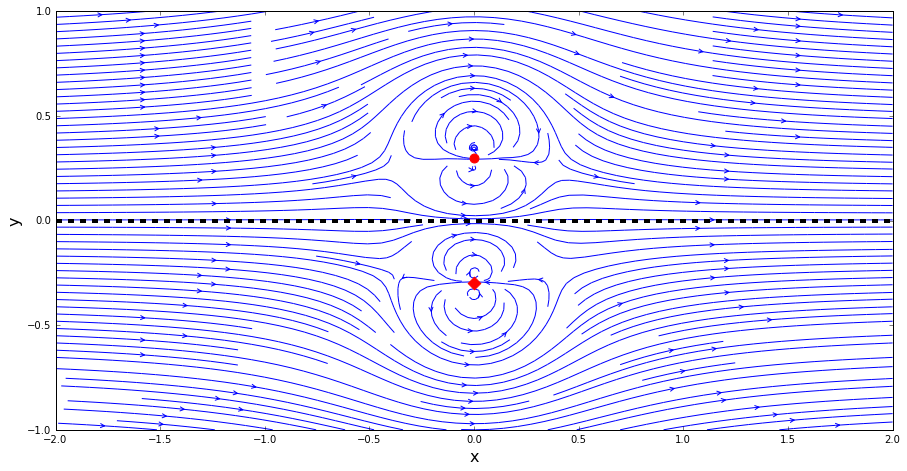

In [76]:
size = 15
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(doublet.x, doublet.y, color='r', s=80, marker='o')
pyplot.scatter(doublet_image.x, doublet_image.y, color='r', s=80, marker='D')
pyplot.axhline(0., color='k', linestyle='--', linewidth=4);